# Программирование и анализ данных

*Алла Тамбовцева, НИУ ВШЭ*

### Работа с датафреймами Pandas:  часть 1

*Часть 1 включает:*

* Загрузка csv-файлов. 
* Описание датафрейма: методы `.info()`, `.describe()` и др.
* Выбор столбца датафрейма по названию и его описание.
* Построение гистограммы для числового столбца и выбор цвета.

### Загрузка файлов

Как мы уже выяснили, библиотека pandas позволяет нам загрузить данные из файла и оформить их в датафрейм. Загрузим файл `firtree.csv` со страницы курса по ссылке и сохраним в датафрейм `tree`:

In [2]:
import pandas as pd
tree = pd.read_csv("https://allatambov.github.io/pydj/seminars/firtree.csv")

Мы могли скачать этот файл себе на компьютер, поместить в рабочую папку через кнопку *Upload* на главной странице *Home* в Jupyter, а потом загрузить его по названию:

In [3]:
tree = pd.read_csv("firtree.csv")

Если файл лежит в какой-то другой папке, его тоже можно достать, прописав полный путь к файлу, но там есть свои сложности, обсудим их позже. А пока посмотрим на то, как описать датафрейм и данные в нем.

### Описание датафрейма

В файле `firtree.csv` хранятся результаты вымышленного опроса покупателей на елочном базаре.

Предполагается, что посетителям елочного базара предлагалось оценить елки разных видов – определить, насколько хороша елка, и назвать сумму, которую они готовы за нее отдать.

**Показатели в файле:**

* `gender` – пол респондента;

* `ftype` – тип елки, которую оценивал респондент;

* `height` – высота елки в сантиметрах;

* `expenses` – сумма (в рублях), которую респондент готов отдать за елку;

* `score` – оценка, которую респондент поставил елке (1 – очень плохо, 5 – отлично);

* `wish` – ответ на вопрос «Хотели бы, чтобы Вам подарили такую елку?» (да, нет).


Теперь посмотрим на техническое описание датафрейма:

In [4]:
tree.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
Unnamed: 0    1200 non-null int64
gender        1200 non-null object
ftype         1200 non-null object
height        1200 non-null int64
score         1200 non-null int64
expenses      1200 non-null int64
wish          1198 non-null object
dtypes: int64(4), object(3)
memory usage: 65.8+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `tree` является объектом *DataFrame*. Во-вторых, он вывел число строк (`RangeIndex: 1200 entries`) и показал их индексы (`0 to 1199`). В-третьих, он вывел число столбцов (`total 7 columns`). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы *non-null* – это все, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице есть столбец `wish`, который заполнен неполностью.

Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Если нас интересует только число строк и столбцов, можем запросить атрибут `.shape`:

In [5]:
tree.shape

(1200, 7)

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [6]:
tree.describe()

,Unnamed: 0,height,score,expenses
count,1200.000000,1200.000000,1200.00000,1200.000000
mean,600.500000,159.066667,3.00500,1629.045000
std,346.554469,51.698012,1.42009,792.819383
min,1.000000,70.000000,1.00000,302.000000
25%,300.750000,115.000000,2.00000,904.750000
50%,600.500000,157.000000,3.00000,1630.500000
75%,900.250000,203.250000,4.00000,2300.000000
max,1200.000000,250.000000,5.00000,2999.000000


По умолчанию этот метод выбирает только числовые столбцы и выводит для них описательные статистики: 

* `count` – число заполненных значений;
* `mean` – среднее арифметическое;
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения);
* `min` – минимальное значение;
* `max` – максимальное значение;
* `25%` – нижний квартиль (значение, которое 25% значений не превышают);
* `50%` – медиана (значение, которое 50% значений не превышают);
* `75%` – верхний квартиль (значение, которое 75% значений не превышают).

Если мы все же хотим описать все столбцы, а не только числовые, можем добавить аргумент `include = 'all'`:

In [7]:
tree.describe(include = 'all')  

,Unnamed: 0,gender,ftype,height,score,expenses,wish
count,1200.000000,1200,1200,1200.000000,1200.00000,1200.000000,1198
unique,NaN,2,4,NaN,NaN,NaN,2
top,NaN,female,сосна Крым,NaN,NaN,NaN,да
freq,NaN,612,327,NaN,NaN,NaN,611
mean,600.500000,NaN,NaN,159.066667,3.00500,1629.045000,NaN
std,346.554469,NaN,NaN,51.698012,1.42009,792.819383,NaN
min,1.000000,NaN,NaN,70.000000,1.00000,302.000000,NaN
25%,300.750000,NaN,NaN,115.000000,2.00000,904.750000,NaN
50%,600.500000,NaN,NaN,157.000000,3.00000,1630.500000,NaN
75%,900.250000,NaN,NaN,203.250000,4.00000,2300.000000,NaN


В таблице выше добавились строки `unique`, `top` и `freq`. Эти характеристики описывают только текстовые столбцы типа *object*:

* `unique` – число уникальных значений в столбце (в `gender` их 2,  `male` и `female`);

* `top` – значение, которое встречается чаще всех (в `gender` больше женщин);

* `freq` – частота для значения в `top` (в `gender` 612 женщин).

Если датафрейм большой, а мы хотим быстро посмотреть на то, какого он вида, можем запросить на экран только первые строчки или последние:

In [8]:
tree.head()  # первые

,Unnamed: 0,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет


In [9]:
tree.tail()  # последние  

,Unnamed: 0,gender,ftype,height,score,expenses,wish
1195,1196,male,ель обыкновенная,137,2,1298,нет
1196,1197,female,пихта Нобилис,141,3,906,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да
1199,1200,male,сосна датская,105,5,2204,нет


Если нам нужно другое число строк (не 5, которые показываются по умолчанию), это можно исправить:

In [10]:
tree.tail(8)  # для head() будет так же 

,Unnamed: 0,gender,ftype,height,score,expenses,wish
1192,1193,male,сосна датская,131,5,2683,нет
1193,1194,male,сосна Крым,138,4,304,да
1194,1195,female,ель обыкновенная,127,4,2932,нет
1195,1196,male,ель обыкновенная,137,2,1298,нет
1196,1197,female,пихта Нобилис,141,3,906,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да
1199,1200,male,сосна датская,105,5,2204,нет


### Выбор столбца датафрейма и его описание

Теперь выберем определенный столбец и опишем его. Для выбора столбца достаточно указать его название в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [11]:
tree["wish"] 

0        да
1       нет
2        да
3        да
4       нет
       ... 
1195    нет
1196     да
1197    нет
1198     да
1199    нет
Name: wish, Length: 1200, dtype: object

Еще столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку:

In [12]:
tree.wish

0        да
1       нет
2        да
3        да
4       нет
       ... 
1195    нет
1196     да
1197    нет
1198     да
1199    нет
Name: wish, Length: 1200, dtype: object

Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет. Для создания нового столбца этот способ тоже не сработает.

Теперь опишем столбец `wish`. Для начала узнаем число заполненных (не NULL и NaN) значений:

In [13]:
tree["wish"].count() 

1198

Так как столбец текстовый, вряд ли будет уместно считать для него среднее, медиану или что-то подобное. Поэтому мы посмотрим на уникальные значения и их частоты:

In [14]:
tree["wish"].unique()  # массив уникальных значений

array(['да', 'нет', nan], dtype=object)

In [15]:
tree["wish"].value_counts() # их частоты, уже без учета NaN

да     611
нет    587
Name: wish, dtype: int64

Теперь выберем числовой столбец `expenses` и опишем его: выведем минимальное значение, максимальное значение и среднее.

In [16]:
tree["expenses"].min()

302

In [18]:
tree["expenses"].max()

2999

In [19]:
tree["expenses"].mean()

1629.045

Как мы уже видели, метод `.describe()` умеет выводить характеристики столбцов всех типов сразу, однако это не всегда выглядит симпатично, так как добавляется много NaN (часть показателей не считается для типа `object`, часть – наоборот). Для удобства можно заранее выбрать все столбцы определенного типа, а потом их описывать:

In [20]:
tree.select_dtypes("int")  # все столбцы типа integer

,Unnamed: 0,height,score,expenses
0,1,190,3,1051
1,2,174,3,2378
2,3,248,4,655
3,4,191,1,2934
4,5,147,3,1198
...,...,...,...,...
1195,1196,137,2,1298
1196,1197,141,3,906
1197,1198,220,5,1591
1198,1199,94,1,1966


In [21]:
tree.select_dtypes("object")

,gender,ftype,wish
0,female,пихта Нобилис,да
1,male,пихта Нобилис,нет
2,female,сосна Крым,да
3,female,сосна Крым,да
4,female,сосна Крым,нет
...,...,...,...
1195,male,ель обыкновенная,нет
1196,female,пихта Нобилис,да
1197,male,сосна Крым,нет
1198,male,сосна датская,да


In [23]:
tree.select_dtypes(["int", "float"])  # если более 1 типа

,Unnamed: 0,height,score,expenses
0,1,190,3,1051
1,2,174,3,2378
2,3,248,4,655
3,4,191,1,2934
4,5,147,3,1198
...,...,...,...,...
1195,1196,137,2,1298
1196,1197,141,3,906
1197,1198,220,5,1591
1198,1199,94,1,1966


### Построение гистограммы для числового столбца

В завершение знакомства с описанием датафреймов Pandas, построим гистограмму для визуализации распределения значений в столбце `expenses`. Для этого нам понадобится библиотека `matpoltlib` для визуализации. Импортируем оттуда модуль `pyplot`:

In [24]:
from matplotlib import pyplot as plt

И напишем магическую строку с `%`, которая позволит Jupyter строить графики прямо в текущем файле, в ячейке после кода, а не в отдельном окне:

In [25]:
%matplotlib inline

Строим гистограмму:

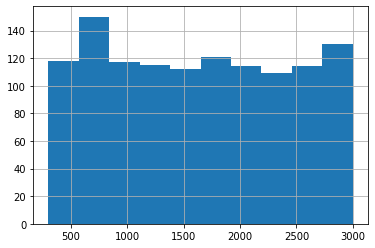

In [26]:
tree["expenses"].hist() 

Поменяем цвет:

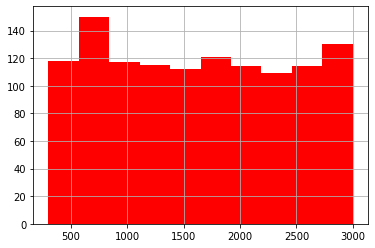

In [27]:
tree["expenses"].hist(color = "red") 

Библиотека `matplotlib` умеет работать с разными форматами цветов, поэтому цвет можно указывать, например, в формате *hexadecimal* (c `#`):

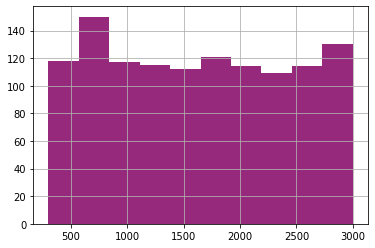

In [28]:
tree["expenses"].hist(color = "#96297b") 

Почитать про цвета в `matplotlib` можно [здесь](https://matplotlib.org/2.0.2/api/colors_api.html), а почитать про форматы цветов – [здесь](https://www.w3schools.com/colors/default.asp). 

*Дополнение:* если набрать `color picker` в Google, он выдаст свой настройщик цветов, в котором можно выбрать цвет, а потом узнать его код в формате *HEX* или *RGB*. 